In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from minisom import MiniSom    
import pandas as pd
import numpy as np
import plotly.express as px

In [8]:
data = pd.read_csv("Data/processed/IGHV_2_classes-clustered_KM.csv", index_col=0).T
data.head()

,cg00000029,cg00000363,cg00001249,cg00001269,cg00001583,cg00001747,cg00001854,cg00001874,cg00002190,cg00002837,...,cg27662481,cg27662505,cg27663031,cg27663071,cg27663249,cg27664085,cg27664407,cg27664689,cg27664844,Phenotypes segregation
GSM4056740,0.057635,0.354353,0.433972,0.688887,0.517182,0.225309,0.095196,0.106635,0.383397,0.212720,...,0.127098,0.215972,0.479048,0.088706,0.465241,0.339083,0.051594,0.445298,0.099585,1.0
GSM4056718,0.953871,0.091226,0.452134,0.022800,0.228642,0.039757,0.063718,0.067420,0.092946,0.878406,...,0.153379,0.013760,0.056495,0.602235,0.478752,0.062978,0.505023,0.551180,0.111583,1.0
GSM4056710,0.449693,0.534821,0.955026,0.030618,0.433832,0.445046,0.067303,0.050488,0.418031,0.888696,...,0.857789,0.022296,0.543724,0.068229,0.958581,0.952190,0.473541,0.965129,0.249649,1.0
GSM4056713,0.885077,0.383795,0.422111,0.085304,0.126704,0.767489,0.275319,0.517630,0.538155,0.101842,...,0.561696,0.018676,0.532568,0.475753,0.670928,0.215293,0.474573,0.046021,0.573963,1.0
GSM4056732,0.912686,0.514823,0.422171,0.028561,0.130650,0.101693,0.054404,0.526072,0.110791,0.143653,...,0.517030,0.279730,0.545570,0.505435,0.042741,0.499661,0.848134,0.519053,0.399340,1.0


In [10]:
data["Phenotypes segregation"].value_counts()

0.0    41
1.0    31
Name: Phenotypes segregation, dtype: int64

In [11]:
#GI
report = pd.read_csv("Data/processed/final_report.csv", index_col=0)

In [12]:
selected_index = report.index

In [57]:
features_space = data.drop("Phenotypes segregation", axis=1)
features_space = features_space[selected_index]

In [58]:
features_space.head()

,cg04246167,cg07150255,cg04847610,cg13028481,cg01074356,cg03802982,cg03772511,cg03657064,cg11940177,cg14625095,...,cg26530275,cg18543991,cg02219476,cg25347941,cg05948962,cg24420742,cg11898688,cg16468417,cg26159205,cg03467825
GSM4056740,0.049584,0.150766,0.434469,0.113096,0.408125,0.139561,0.421696,0.037170,0.045388,0.064850,...,0.631407,0.428661,0.045559,0.077897,0.441470,0.281221,0.075430,0.573248,0.414408,0.064930
GSM4056718,0.729542,0.869838,0.080175,0.094400,0.114014,0.380890,0.280470,0.027941,0.019551,0.491557,...,0.039168,0.060274,0.073575,0.088879,0.106531,0.021683,0.113686,0.344904,0.091555,0.046251
GSM4056710,0.461256,0.608395,0.058754,0.206685,0.543258,0.126053,0.465448,0.823667,0.829026,0.423539,...,0.761261,0.088870,0.393109,0.161055,0.825775,0.943320,0.496487,0.412350,0.234574,0.489591
GSM4056713,0.504408,0.516454,0.422851,0.079718,0.087255,0.116156,0.135138,0.795511,0.191821,0.051037,...,0.035708,0.596671,0.074024,0.474357,0.192190,0.048791,0.532237,0.299179,0.427417,0.131874
GSM4056732,0.969571,0.130868,0.437017,0.112484,0.504082,0.837212,0.689328,0.956165,0.250911,0.048817,...,0.466332,0.914898,0.786358,0.821242,0.077565,0.037186,0.924223,0.397194,0.413315,0.449951


In [59]:
features_space = StandardScaler().fit_transform(features_space)

In [36]:
features_space.shape

(72, 467)

In [37]:
grid = 5 * features_space.shape[0]**0.5
grid = int(round(grid ** 0.5, 0))
dim = features_space.shape[1]

In [40]:
som = MiniSom(grid, grid, 
              input_len=dim, 
              sigma=.5,
              learning_rate=1,
             random_seed=101) # initialization of SOM

In [41]:
som.random_weights_init(features_space)
som.train(features_space, 1000, verbose=True)

 [  447 / 1000 ]  45% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 7.325720438839754


In [44]:
target = data["Phenotypes segregation"].values.ravel()
t = pd.Series(target, name="Class")
t

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
67    0.0
68    1.0
69    0.0
70    1.0
71    0.0
Name: Class, Length: 72, dtype: float64

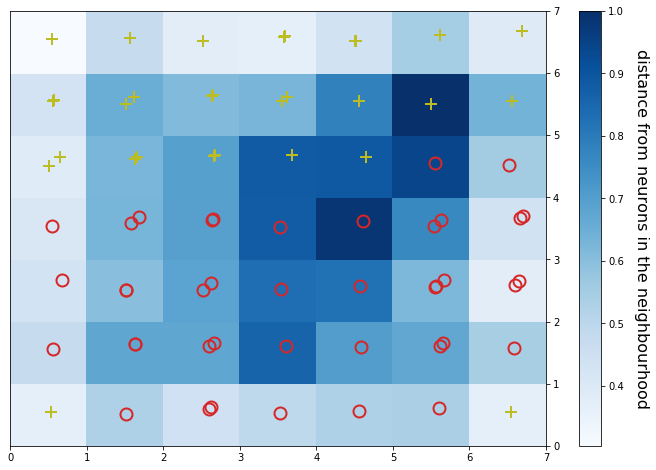

In [45]:
markers = ['o', '+']
colors = ['C3', 'C8']
np.random.seed = 101

fig, ax = plt.subplots(figsize=(12, 8))
x = ax.pcolor(som.distance_map().T, cmap='Blues')
fig.colorbar(mappable=x)

for cnt, xx in enumerate(features_space):
    w = som.winner(xx)  # getting the winner
    
    # palce a marker on the winning position for the sample xx
    r = np.random.random_sample() / 5
    ax.plot(w[0]+0.5 + r, w[1]+0.5 + r, markers[int(target[cnt])], markerfacecolor='None',
             markeredgecolor=colors[int(target[cnt])], 
             markersize=12, 
             markeredgewidth=2)


ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16, labelpad=90)

plt.show()

In [52]:
pca = PCA(n_components=50)
tsne = TSNE(n_components=2, random_state=101, method="exact")

In [60]:
ca_features_space = pca.fit_transform(features_space)
features_space_2d = tsne.fit_transform(ca_features_space)

In [61]:
df = pd.concat((pd.DataFrame(features_space_2d, columns=["C1", "C2"]), t), axis=1)
df["Class"] = df["Class"].astype(str)

In [62]:
fig = px.scatter(df, x="C1", y="C2", color="Class")
fig.show()

In [63]:
# SOM 2x1

In [64]:
som = MiniSom(2, 1, 
              input_len=dim, 
              sigma=.1,
              learning_rate=1,
             random_seed=101) # initialization of SOM

som.random_weights_init(features_space)
som.train(features_space, 1000, verbose=True)

 [  881 / 1000 ]  88% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 20.186060065855465


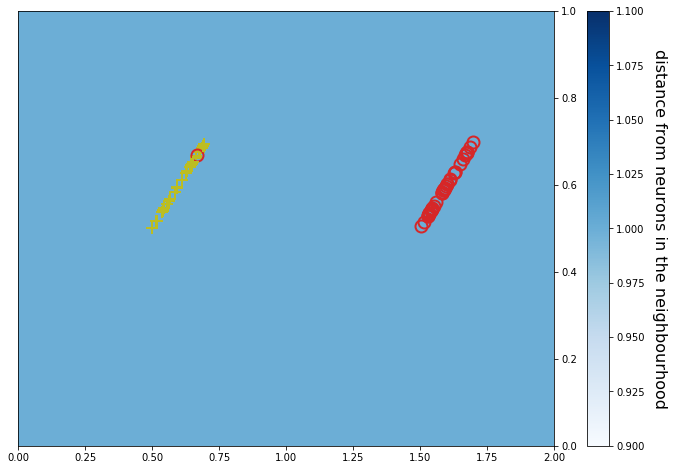

In [65]:
markers = ['o', '+']
colors = ['C3', 'C8']
np.random.seed = 101

fig, ax = plt.subplots(figsize=(12, 8))
x = ax.pcolor(som.distance_map().T, cmap='Blues')
fig.colorbar(mappable=x)

for cnt, xx in enumerate(features_space):
    w = som.winner(xx)  # getting the winner
    
    # palce a marker on the winning position for the sample xx
    r = np.random.random_sample() / 5
    ax.plot(w[0]+0.5 + r, w[1]+0.5 + r, markers[int(target[cnt])], markerfacecolor='None',
             markeredgecolor=colors[int(target[cnt])], 
             markersize=12, 
             markeredgewidth=2)


ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16, labelpad=90)

plt.show()

In [525]:
# Example how SOM works

In [495]:
from sklearn.datasets import make_classification

In [510]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_classes=2, class_sep=10)

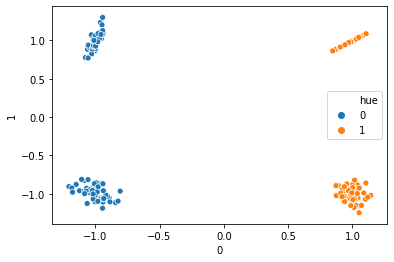

In [524]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y, columns=["hue"])

df = pd.concat((df_x, df_y), axis=1)
sns.scatterplot(data=df, x=df[0], y=df[1], hue="hue")

In [511]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [514]:
som2 = MiniSom(15, 15, 
              input_len=2, 
              sigma=1, 
              learning_rate=1,
             topology="hexagonal",
             random_seed=101) # initialization of SOM

In [515]:
som2.random_weights_init(X)
som2.train(X, 2500, verbose=True)

 [  628 / 2500 ]  25% - 0:00:00 left 

 [ 1288 / 2500 ]  52% - 0:00:00 left 

 [ 1858 / 2500 ]  74% - 0:00:00 left 

 [ 2365 / 2500 ]  95% - 0:00:00 left 

 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 0.010049663193306779


In [516]:
winner_coordinates2 = np.array([som2.winner(x) for x in X]).T
cluster_index2 = np.ravel_multi_index(winner_coordinates2, (15, 15))

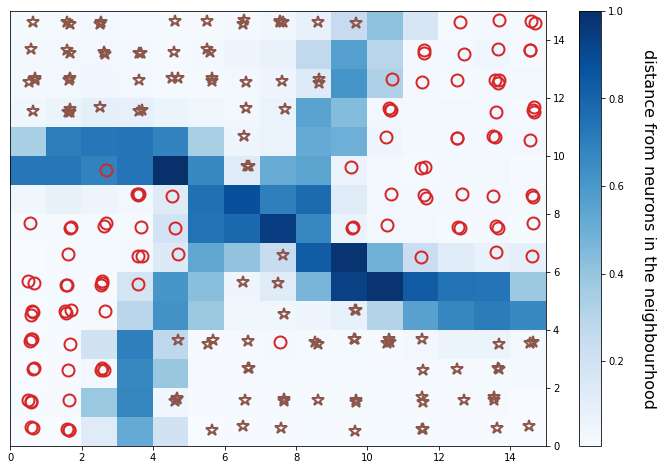

In [517]:
markers = ['o', '+', "*"]
colors = ['C3', 'C8', "C5"]
np.random.seed = 101

fig, ax = plt.subplots(figsize=(12, 8))
x = ax.pcolor(som2.distance_map().T, cmap='Blues')
fig.colorbar(mappable=x)

for cnt, xx in enumerate(X):
    w = som2.winner(xx)  # getting the winner
    
    # palce a marker on the winning position for the sample xx
    r = np.random.random_sample() / 5
    z = np.random.random_sample() / 5
    
    ax.plot(w[0]+0.5 + r, w[1]+0.5 + z, markers[int(y[cnt] -1)], markerfacecolor='None',
             markeredgecolor=colors[int(y[cnt] -1)], 
             markersize=12, 
             markeredgewidth=2)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16, labelpad=90)

plt.show()